<a href="https://colab.research.google.com/github/isaacmedina/machinelearning/blob/main/taller_modelos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression vs Linear SVM
Demostración breve: Regresión logística vs. SVM lineal en un pequeño conjunto de datos 2D.
Lee week2.csv, entrena ambos modelos, imprime la precisión y guarda 3 gráficos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# 1) Data (edit the path if needed)
path = "/content/week2.csv"

# skip the header line starting with '#', read 3 cols
data = pd.read_csv(path, comment="#", header=None, names=["X1","X2","y"])

In [7]:
# make sure everything is numeric; turn non-numeric to NaN
for c in ["X1","X2","y"]:
    data[c] = pd.to_numeric(data[c], errors="coerce")


In [8]:
# drop rows where y (or features) is NaN
data = data.dropna(subset=["X1","X2","y"]).reset_index(drop=True)

In [9]:
# if labels are {0,1}, map to {-1,+1} (optional for your plots)
if set(data["y"].unique()) == {0.0, 1.0}:
    data["y"] = data["y"].map({0.0: -1, 1.0: 1})

X = data[["X1","X2"]].to_numpy()
y = data["y"].astype(int).to_numpy()


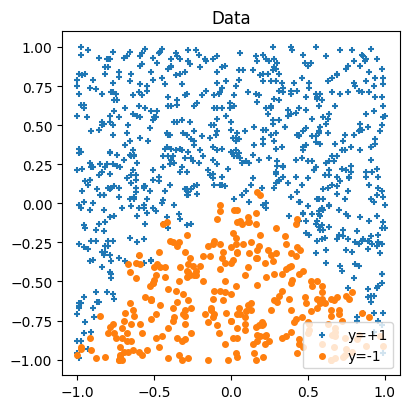

In [10]:
# Scatter
plt.figure(figsize=(4.2, 4.2))
plt.scatter(data.loc[y==1, "X1"],  data.loc[y==1, "X2"], s=20, marker="+", label="y=+1")
plt.scatter(data.loc[y==-1,"X1"],  data.loc[y==-1,"X2"], s=16,            label="y=-1")
plt.legend(); plt.title("Data"); plt.tight_layout(); plt.savefig("fig_scatter.png");
plt.show()

In [11]:
# 2) Split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

In [20]:
# 3) Models (pipelines with scaling)
lr  = Pipeline([("clf", LogisticRegression(C=1, max_iter=300, random_state=4))]).fit(Xtr, ytr)
svm = Pipeline([("clf", LinearSVC(C=1, random_state=4))]).fit(Xtr, ytr)

In [21]:
# Print quick metrics
for name, model in [("LR", lr), ("LinearSVC", svm)]:
    yhat = model.predict(Xte)
    print(f"[{name}] acc={accuracy_score(yte, yhat):.3f}")
    print(confusion_matrix(yte, yhat, labels=[-1, 1]))
    print(classification_report(yte, yhat, target_names=["-1", "+1"]))


[LR] acc=0.880
[[ 46  13]
 [ 11 130]]
              precision    recall  f1-score   support

          -1       0.81      0.78      0.79        59
          +1       0.91      0.92      0.92       141

    accuracy                           0.88       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.88      0.88      0.88       200

[LinearSVC] acc=0.890
[[ 48  11]
 [ 11 130]]
              precision    recall  f1-score   support

          -1       0.81      0.81      0.81        59
          +1       0.92      0.92      0.92       141

    accuracy                           0.89       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.89      0.89       200



In [14]:
# 4) Decision regions (same helper for both)
def plot_regions(model, fname):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                         np.linspace(y_min, y_max, 400))
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(4.6, 4.6))
    plt.contourf(xx, yy, ZZ, alpha=0.18)
    plt.scatter(X[y==1,0],  X[y==1,1],  s=20, marker="+", label="y=+1")
    plt.scatter(X[y==-1,0], X[y==-1,1], s=16,            label="y=-1")
    plt.legend(); plt.title("Decision regions")
    plt.tight_layout(); plt.savefig(fname);
    plt.show()

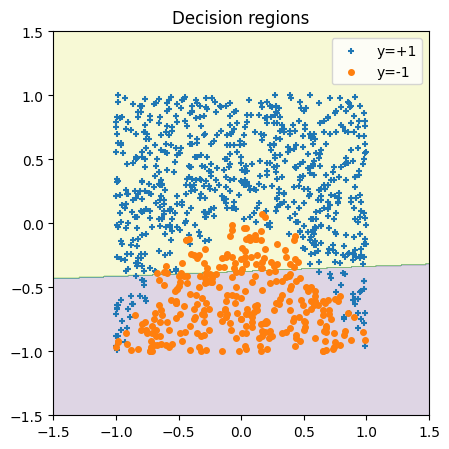

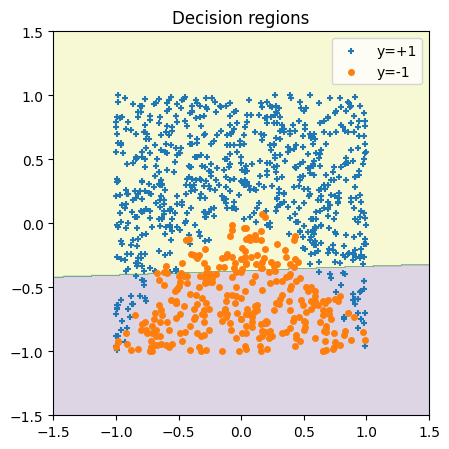

In [15]:
plot_regions(lr,  "fig_regions_lr.png")
plot_regions(svm, "fig_regions_svm.png")